# Players Selling Price Prediction In IPL


## Introduction 
Indian Premier League or as it is famously known IPL is one of the most loved cricket championships across the world. It was started in 2007 by the BCCI in India having 20-20 cricket formats and eight teams. Teams can have national or international players. This was the main game-changer in this championship since players from different national teams can now play together which many fans have wanted to see for a long time.

There are eight teams in IPL that were introduced at the beginning which are as follows:

1. <a href= "https://www.espncricinfo.com/ipl/content/squad/338086.html">Bangalore Royal Challengers</a>
2. <a href= "https://www.espncricinfo.com/ipl/content/squad/338085.html">Chennai Super Kings</a>
3. <a href= "https://www.espncricinfo.com/ipl/content/squad/338087.html">Deccan Chargers</a>
4. <a href= "https://www.espncricinfo.com/ipl/content/squad/338089.html">Delhi Daredevils</a>
5. <a href= "https://www.espncricinfo.com/ipl/content/squad/338083.html">Kings XI Punjab</a>
6. <a href= "https://www.espncricinfo.com/ipl/content/squad/338088.html">Kolkata Knight Riders</a>
7. <a href= "https://www.espncricinfo.com/ipl/content/squad/338082.html">Mumbai Indians</a>
8. <a href= "https://www.espncricinfo.com/ipl/content/squad/338084.html">Rajasthan Royals</a>

An auction was held initially to decide the ownership of teams for the time period of 10 years with a base price of USD 50 million. There are several rules that are imposed by IPL that need to be followed to be in an IPL team. For example, Only international and famous Indian players are auctioned. Each player has a base price which is decided by various performance metrics.  Even though IPL follows the 20-20 cricket format it is possible that the base price of a player is influenced by the performance of players in other cricket formats line One-Day-International(ODI) and Test-Match.

In this article, we will try to predict the selling price of a player given their past performances in other cricket formats. The data we will be using have information of 130 players who played in at least one season of IPL from 2008 till 2011.

#### <b> Developing Multiple Linear Regression Model with Machine Learning. </b>

In this section, we will be discussing various steps involved in developing a multiple linear regression model using python.

1. Loading dataset
2. Displaying the first five records
3. Encoding Categorical Features
4. Splitting the dataset into train and validation sets
5. Building the Model on the Training Dataset
6. Multi-Collinearity and Handling Multi-Collinearity
7. Build a new model after Removing Multi-collinearity

Let's Go....

### 1. Loading the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
ipl_au = pd.read_csv("IPL_Dataset.csv")

In [3]:
ipl_au.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

There are 130 observtions and 26 columns in the data, and there are no missing values.

### 2. Display first five records.

As the number of columns is very large, we will display the initial 10 columns for the first 5 rows. The  function 'iloc()' is used for displaying a subset of the dataset.

In [4]:
ipl_au.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


We can build a model to understand what features of players are influencing their solid price or predict the player's auction price in future.

We will create a variable x_features which contain the list of features that we will finally use for building the model and ignore the rest of the dataframe. The following function is used for including the features in the model building.

In [5]:
x_features = ipl_au.columns

Most of the features in the dataset are numerical whereas features such as age, country, playing-role, captaincy-exp are cetegorical and hence need to be encoded before building the model.

In [6]:
x_features=['AGE','COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

Categorical variable can not be directly included in the regression model building. Let's move to how to do encoding categorical features.

### 3. Encoding Categorical Features

Categorical variable need to be encoded using dummy variable before building the model. If a categorical variable has n categories then we will need n-1 dummy variables. So in the case of playing-role, we will need three dummy variables since there are four categories. Finding unique values of column playing role show the values.

In [7]:
ipl_au['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

The variable convert into four dummy variables. This can be done using the 'get_dummy()' method of 'pandas'.

In [8]:
pd.get_dummies(ipl_au['PLAYING ROLE'])

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
125,0,1,0,0
126,0,1,0,0
127,0,1,0,0
128,0,0,1,0


We can create dummy variable for all categorical variable present  in the dataset.

In [9]:
cate_features=['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']
ipl_au_encoded_df = pd.get_dummies(ipl_au[x_features],columns=cate_features,drop_first=True)
ipl_au_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

The dataset contains the new dummy variables that have been created. we can reassign the new features to the variable x_features, which we created earlier to keep track of all features that will be used to build the model finally.

In [10]:
x_features = ipl_au_encoded_df.columns

### 4. Splitting the datset into train and validation set

Before building the model, we will split the dataset into 80-20 ratios. The split function allows using a parameter random_state, which is a seed function for randomness, Here we will use the random state value is 42.

In [11]:
#import stats models api as sm
from statsmodels import api as sm
from sklearn.model_selection import train_test_split

In [12]:
x = sm.add_constant(ipl_au_encoded_df)
y = ipl_au['SOLD PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.8, random_state=42)

Using another random vale may give different training and test data hence different results.

### 5. Building the Model on the Training Dataset

We will build the Multiple Linear Regression (MLR) model using training dataset and analyze the model summary. The Summary provides details of the model accuracy, feature significance, and signs of any multi-collinearity effect, which will discuss in detail in the next section.

In [13]:
ipl_model_1=sm.OLS(Y_train,X_train).fit()
ipl_model_1.summary2()

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                OLS                Adj. R-squared:       nan      
Dependent Variable:   SOLD PRICE         AIC:                  -592.1167
Date:                 2021-07-26 17:52   BIC:                  -559.4061
No. Observations:     26                 Log-Likelihood:       322.06   
Df Model:             25                 F-statistic:          nan      
Df Residuals:         0                  Prob (F-statistic):   nan      
R-squared:            1.000              Scale:                inf      
------------------------------------------------------------------------
                          Coef.     Std.Err.    t    P>|t| [0.025 0.975]
------------------------------------------------------------------------
const                   889878.5781      inf  0.0000   nan    nan    nan
T-RUNS                      -8.4505      inf -0.0000   nan    nan    nan
T-WKTS                    -789.8825      inf -0.0000   nan    nan    nan
ODI-RUNS-S                 -18.5443      inf -0.0000   nan    nan    nan
ODI-SR-B                 -3968.0917      inf -0.0000   nan    nan    nan
ODI-WKTS                  1106.1315      inf  0.0000   nan    nan    nan
ODI-SR-BL               -10001.6010      inf -0.0000   nan    nan    nan
RUNS-S                    -119.7123      inf -0.0000   nan    nan    nan
HS                       -7054.0690      inf -0.0000   nan    nan    nan
AVE                      30238.5591      inf  0.0000   nan    nan    nan
SR-B                     -3917.3870      inf -0.0000   nan    nan    nan
SIXERS                   12088.0647      inf  0.0000   nan    nan    nan
RUNS-C                    -108.3615      inf -0.0000   nan    nan    nan
WKTS                     13135.5269      inf  0.0000   nan    nan    nan
AVE-BL                   12132.0004      inf  0.0000   nan    nan    nan
ECON                    -52411.2861      inf -0.0000   nan    nan    nan
SR-BL                   -13051.7440      inf -0.0000   nan    nan    nan
AGE_2                   437507.4351      inf  0.0000   nan    nan    nan
AGE_3                   452371.1430      inf  0.0000   nan    nan    nan
COUNTRY_BAN              45793.9965      inf  0.0000   nan    nan    nan
COUNTRY_ENG             335357.2354      inf  0.0000   nan    nan    nan
COUNTRY_IND            -270772.4785      inf -0.0000   nan    nan    nan
COUNTRY_NZ             -131153.1394      inf -0.0000   nan    nan    nan
COUNTRY_PAK            -138027.6865      inf -0.0000   nan    nan    nan
COUNTRY_SA             -181622.4257      inf -0.0000   nan    nan    nan
COUNTRY_SL               78169.5975      inf  0.0000   nan    nan    nan
COUNTRY_WI                1766.1377      inf  0.0000   nan    nan    nan
COUNTRY_ZIM            -468324.9232      inf -0.0000   nan    nan    nan
PLAYING ROLE_Batsman   -241217.9400      inf -0.0000   nan    nan    nan
PLAYING ROLE_Bowler     -77076.7114      inf -0.0000   nan    nan    nan
PLAYING ROLE_W. Keeper -318620.5133      inf -0.0000   nan    nan    nan
CAPTAINCY EXP_1         611580.9227      inf  0.0000   nan    nan    nan
------------------------------------------------------------------------
Omnibus:                 23.941         Durbin-Watson:            2.210 
Prob(Omnibus):           0.000          Jarque-Bera (JB):         38.229
Skew:                    1.958          Prob(JB):                 0.000 
Kurtosis:                7.467          Condition No.:            228440
========================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In the MLR model, as per the p-value (< 0.05), only the features HS, AGE_2, AVE and Country_ENG have come out significant. The model says that none of the other features is influening sold price.This is not very intuitive and colud be a result of the multi-collinearly effect of variables. For better results, we need to handle multicollinearity. Let's understand what this is?

### 6. Multi-Collinearity and Handling Multi-Collinearity

When the dataset has a large number of independent variables, it is possible that few of these independent variables may be highly correlated. The existence of a high correlation between independent variable is called multi-collinearity.

The presence of multicollinearity can destabilize the multiple liear regression model. It is necessary to identify the presence of multi-collinearity and take corrective actions.

There are two ways to handle multi-collinearity:-

#### 6.1 Variance Inflation Factor (VIP)

The variance inflation factor is a used for identifying the existence of multi-colliearity.

variance_inflation_factor() method available in statsmodels.stats.outliers_influence package can be used to calculate VIF for the features.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors(x):
    x_matrix = x.to_numpy()
    vif = [variance_inflation_factor(x_matrix, i) for i in range(x_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = x.columns
    vif_factors['VIF'] = vif
    return vif_factors

Now, calling the above function with the x features will return the VIF for th corresponding features.

In [15]:
vif_factors = get_vif_factors(x[x_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


#### 6.2. Checking correlation of columns with large VIFs

We can generate a correlation heatmap to understand the correlation between the independent variable which can be used ti decide which feature to include in the model. We will first select the features that have a VIF value of more than 4.

In [17]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

##### Then plot the heatmap for features with VIF more than 4.

Text(0.5, 1.0, 'Heatmap depicting corr between features')

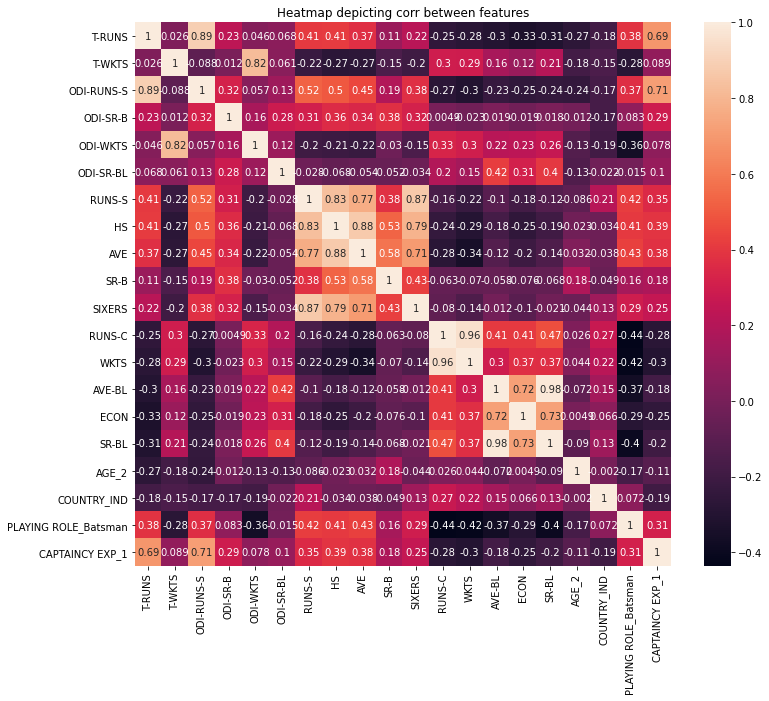

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
sn.heatmap(x[columns_with_large_vif].corr(), annot = True)
plt.title("Heatmap depicting corr between features")

To avoid mlticollinearity, we can keep only one column from each group of highly correlated variable and removes the others. We have decided to remove the following features.

In [19]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'SR-BL', 'AGE_2']
x_new_features = list(set(x_features) - set(columns_to_be_removed))
get_vif_factors(x[x_new_features])

,column,VIF
0,COUNTRY_SA,1.416657
1,COUNTRY_BAN,1.094293
2,SIXERS,2.397409
3,PLAYING ROLE_W. Keeper,1.900941
4,ODI-SR-BL,2.822148
5,COUNTRY_WI,1.194093
6,COUNTRY_IND,3.144668
7,COUNTRY_NZ,1.173418
8,WKTS,2.883101
9,COUNTRY_PAK,1.334773


The VIFs on the final set of variable indicate that there is no multicollinearity present anymore.
<br>Now we can proceed to build the model with this set of variable now.

### 7. Build a new model after Removing Multi-collinearity

In [21]:
X_train = X_train[x_new_features]
ipl_model_2 = sm.OLS(Y_train, X_train).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                     OLS                 Adj. R-squared (uncentered):    0.734     
Dependent Variable:        SOLD PRICE          AIC:                            726.5558  
Date:                      2021-07-26 18:08    BIC:                            749.2015  
No. Observations:          26                  Log-Likelihood:                 -345.28   
Df Model:                  18                  F-statistic:                    4.990     
Df Residuals:              8                   Prob (F-statistic):             0.0130    
R-squared (uncentered):    0.918               Scale:                          6.5193e+10
-----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------
COUNTRY_SA              131595.5769 244598.4534  0.5380 0.6052  -432449.4680  695640.6217
COUNTRY_BAN              23581.5102 356534.9033  0.0661 0.9489  -798589.4512  845752.4716
SIXERS                    7197.9698   4001.9435  1.7986 0.1098    -2030.5286   16426.4682
PLAYING ROLE_W. Keeper  249197.2581 953515.8213  0.2613 0.8004 -1949614.1687 2448008.6849
ODI-SR-BL                -2393.1315   4933.2810 -0.4851 0.6406   -13769.2978    8983.0349
COUNTRY_WI              111995.4430 247985.1033  0.4516 0.6635  -459859.2307  683850.1166
COUNTRY_IND             194453.4472 200170.7093  0.9714 0.3598  -267141.0362  656047.9306
COUNTRY_NZ                2853.6269 499747.1453  0.0057 0.9956 -1149565.3567 1155272.6105
WKTS                      1678.3716   4682.1678  0.3585 0.7293    -9118.7268   12475.4699
COUNTRY_PAK             529372.4605 450178.8023  1.1759 0.2734  -508741.7192 1567486.6401
COUNTRY_SL               80584.4154 288472.4356  0.2793 0.7871  -584634.2140  745803.0448
PLAYING ROLE_Bowler     144699.5235 250451.5924  0.5778 0.5793  -432842.8842  722241.9311
COUNTRY_ENG            1535104.5020 457746.3369  3.3536 0.0100   479539.5564 2590669.4477
COUNTRY_ZIM            -125826.3628 798206.5308 -0.1576 0.8786 -1966493.9234 1714841.1977
ODI-WKTS                  -152.9691    900.6347 -0.1698 0.8693    -2229.8365    1923.8982
CAPTAINCY EXP_1         102446.5642 401322.2222  0.2553 0.8050  -823004.1396 1027897.2681
PLAYING ROLE_Batsman     90338.0682 190588.6646  0.4740 0.6482  -349160.1804  529836.3169
AGE_3                   264815.9264 394333.5755  0.6716 0.5208  -644518.9294 1174150.7821
-----------------------------------------------------------------------------------------
Omnibus:                      14.059               Durbin-Watson:                  2.266 
Prob(Omnibus):                0.001                Jarque-Bera (JB):               16.569
Skew:                         1.197                Prob(JB):                       0.000 
Kurtosis:                     6.093                Condition No.:                  3691  
=========================================================================================
* The condition number is large (4e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

Based on the p-values, only the variable Country_IND, Country_ENG, SIXERS, CAPTAINCY, EXP_1 have come out statstically significant. So, the features that decide the cold price are

 1. Players belong to India or the origin country of the player.
 2. Howmany sixes has the player hit in th previous of the IPL?
 3. How many wickets have been taken by the player in the ODI?
 4. Player has any previous captaincy experience or not?

Let's create a new list called significant_vars to store the column name of significant variables and build a new model.

In [22]:
significant_vars = ['COUNTRY_ENG', 'COUNTRY_IND', 'SIXERS', 'CAPTAINCY EXP_1']
X_train = X_train[significant_vars]
ipl_model_3 = sm.OLS(Y_train, X_train).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.842     
Dependent Variable:     SOLD PRICE       AIC:                         711.3341  
Date:                   2021-07-26 18:16 BIC:                         716.3665  
No. Observations:       26               Log-Likelihood:              -351.67   
Df Model:               4                F-statistic:                 35.64     
Df Residuals:           22               Prob (F-statistic):          2.57e-09  
R-squared (uncentered): 0.866            Scale:                       3.8754e+10
--------------------------------------------------------------------------------
                    Coef.       Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_ENG      1233485.8930 213032.2715 5.7901 0.0000 791684.0026 1675287.7833
COUNTRY_IND       275288.0064  77907.5371 3.5335 0.0019 113717.6634  436858.3494
SIXERS              6535.3772   1799.5869 3.6316 0.0015   2803.2624   10267.4920
CAPTAINCY EXP_1   303443.3526  81806.4508 3.7093 0.0012 133787.1576  473099.5477
--------------------------------------------------------------------------------
Omnibus:                    0.430             Durbin-Watson:               2.131
Prob(Omnibus):              0.807             Jarque-Bera (JB):            0.363
Skew:                       -0.257            Prob(JB):                    0.834
Kurtosis:                   2.736             Condition No.:               143  
================================================================================

"""